Loading & exploring data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./DataSets/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print("Shape of data : ",data.shape)

Shape of data :  (299, 13)


In [4]:
print("Info about data")
data.info()

Info about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
print("Describe data")
data.describe()

Describe data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
print("No of null values")
data.isnull().sum()

No of null values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Exploration Data analysis

Total no of living cases :  203
Total no of died cases :  96


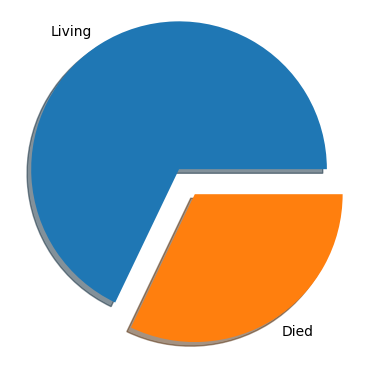

In [7]:
len_live = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])
len_death = len(data['DEATH_EVENT'][data.DEATH_EVENT == 1])

arr = np.array([len_live,len_death])
labels=['Living','Died']

print("Total no of living cases : ", len_live)
print("Total no of died cases : ", len_death)

plt.pie(arr, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()


#we can see in pie chart that data is imbalance. 
#As living cases are 203 and death cases are 96.
#So in most of cases predicted output will be 0.

#imbalance :- your data is not equally distributed between classes.

/tmp/ipykernel_19029/3119767304.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


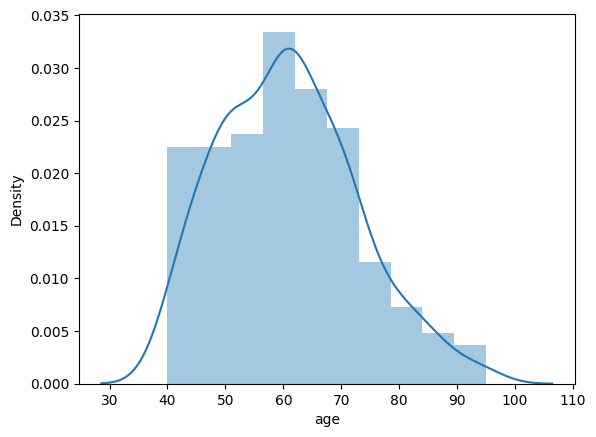

In [8]:
#seeing distribution of age

sns.distplot(data['age'])
plt.show()

Total no of living cases above 50 :  167
Total no of died cases above 50 :  85


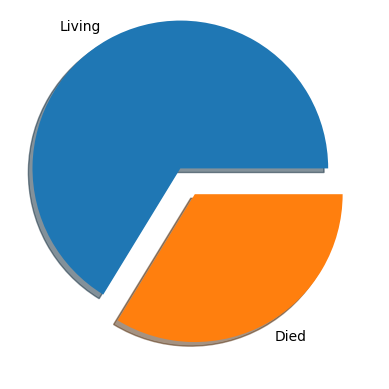

In [9]:
#selecting column whose age is above 50 and seeing died or not

age_above_50_not_died = len(data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT == 0])
age_above_50_died = len(data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT == 1])


print("Total no of living cases above 50 : ", age_above_50_not_died)
print("Total no of died cases above 50 : ", age_above_50_died)

arr1 = np.array([age_above_50_not_died,age_above_50_died])
labels=['Living','Died']

plt.pie(arr1,labels=labels,explode=[0.2,0.0],shadow=True)

plt.show()


Total no of living cases who have diabetes :  85
Total no of died cases above 50 who have diabetes:  40


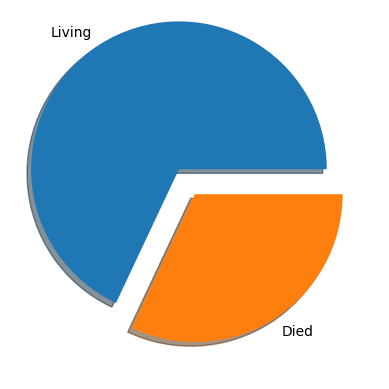

In [10]:
#selecting column who have diabetes and seeing died or not

having_diabetes_not_died = len(data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT == 0])
having_diabetes_died = len(data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT == 1])


print("Total no of living cases who have diabetes : ", having_diabetes_not_died)
print("Total no of died cases above 50 who have diabetes: ", having_diabetes_died)

arr2 = np.array([having_diabetes_not_died,having_diabetes_died])
labels=['Living','Died']

plt.pie(arr2,labels=labels,explode=[0.2,0.0],shadow=True)

plt.show()

<Axes: >

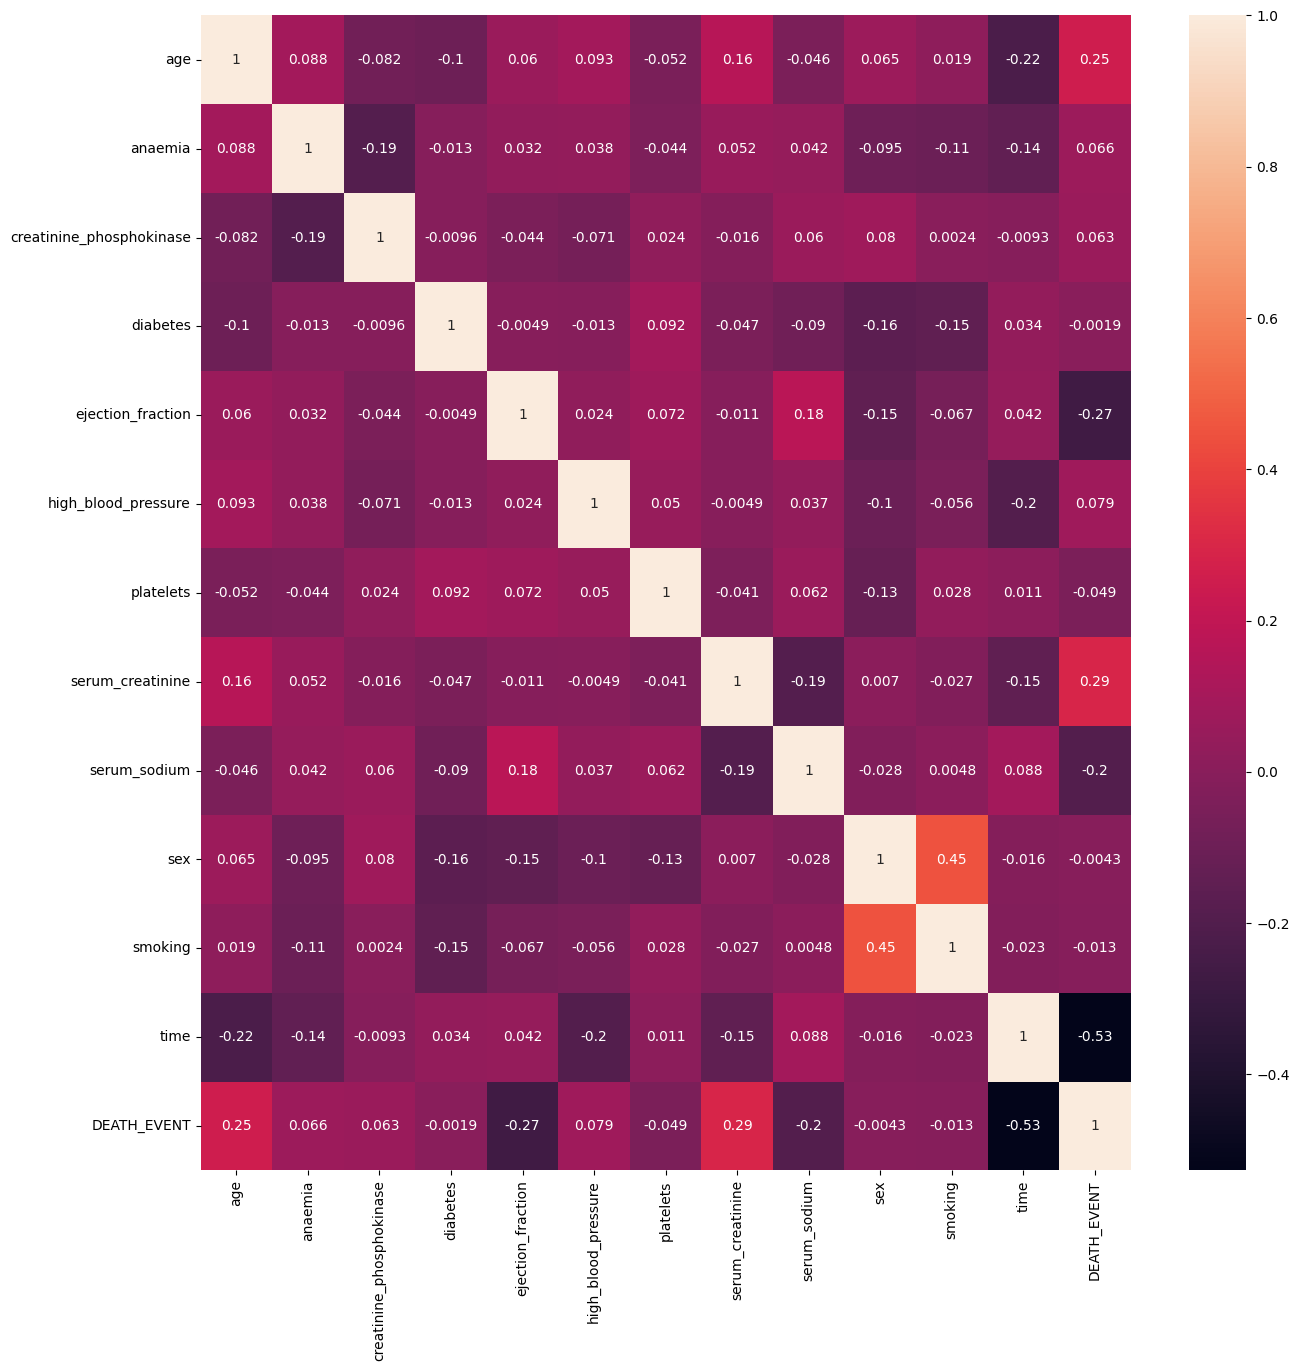

In [11]:
#checking the correlation of our variables

corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

Dataset Development

In [12]:
from sklearn.model_selection import train_test_split
x = data.drop('DEATH_EVENT',axis=1)
y = data['DEATH_EVENT']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of Y_test :",Y_test.shape)

Shape of X_train :  (209, 12)
Shape of Y_train :  (209,)
Shape of X_test : (90, 12)
Shape of Y_test : (90,)


Model Building

In [13]:
#evaluating function
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    print("Accuracy score : ", accuracy_score(y_test,y_pred))
    print("Precision score : ", precision_score(y_test,y_pred))
    print("Recall score : ", recall_score(y_test,y_pred))
    print("Confusion matrix : \n", confusion_matrix(y_test,y_pred))

In [14]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [15]:
y_pred = lr_clf.predict(X_test)
evaluating_model(Y_test, y_pred)

Accuracy score :  0.8111111111111111
Precision score :  0.7894736842105263
Recall score :  0.5357142857142857
Confusion matrix : 
 [[58  4]
 [13 15]]


In [16]:
# building logistic regression with standardScalar
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(),LogisticRegression())
lr_clf_pip.fit(X_train,Y_train)

y_pred1 = lr_clf.predict(X_test)
evaluating_model(Y_test, y_pred1)

Accuracy score :  0.8111111111111111
Precision score :  0.7894736842105263
Recall score :  0.5357142857142857
Confusion matrix : 
 [[58  4]
 [13 15]]


In [17]:
#build model using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train,Y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score : {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print("Test score : {:.3f}".format(accuracy))
    return best_model


randomized_search(params={
    'criterion':['entropy','gini'],
    'splitter':['random','best'],
    'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
    'min_samples_split':[2,3,4,5,6,8,10],
    'min_samples_leaf':[1,0.01,0.02,0.03,0.04],
    'min_impurity_decrease':[0.0,0.0005,0.005,0.05,0.10,0.15,0.2],
    'max_leaf_nodes':[10,15,20,25,30,35,40,45,None],
    'max_features':['auto',0.95,0.90,0.85,0.80,0.75,0.70],
    'max_depth':[None,2,4,6,8],
    'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01,0.05]
})

Training score : 0.842
Test score : 0.856


/home/vedant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vedant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vedant/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/vedant/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vedant/.loca

DecisionTreeClassifier(max_depth=6, max_features=0.8, max_leaf_nodes=40,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=8, min_weight_fraction_leaf=0.0025,
                       random_state=2)

In [18]:
ds_clf = DecisionTreeClassifier(max_depth=6, max_features=0.8, max_leaf_nodes=40,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=8, min_weight_fraction_leaf=0.0025,
                       random_state=2)
ds_clf.fit(X_train,Y_train)
pred4 = ds_clf.predict(X_test)
evaluating_model(Y_test,pred4)

Accuracy score :  0.8555555555555555
Precision score :  0.8571428571428571
Recall score :  0.6428571428571429
Confusion matrix : 
 [[59  3]
 [10 18]]


In [19]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
    'min_samples_leaf':[1,2,4,6,8,10,20,30],
    'min_impurity_decrease':[0.0,0.01,0.05,0.1,0.15,0.2],
    'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
    'max_depth':[None,2,4,6,8,10,20]
},clf=RandomForestClassifier(random_state=2))

Training score : 0.847
Test score : 0.867


/home/vedant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vedant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vedant/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/vedant/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/vedant/.local

RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [20]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)
rf_clf.fit(X_train,Y_train)
pred5 = rf_clf.predict(X_test)
evaluating_model(Y_test,pred5)

Accuracy score :  0.8666666666666667
Precision score :  0.9
Recall score :  0.6428571428571429
Confusion matrix : 
 [[60  2]
 [10 18]]


In [21]:
#gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier

gdbt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=1,random_state=0)
gdbt.fit(X_train,Y_train)

pred6 = gdbt.predict(X_test)
evaluating_model(Y_test,pred6)

Accuracy score :  0.8555555555555555
Precision score :  0.8571428571428571
Recall score :  0.6428571428571429
Confusion matrix : 
 [[59  3]
 [10 18]]


In [32]:
import joblib
joblib.dump(rf_clf, './Models/heartModel.pkl')
model = joblib.load('./Models/heartModel.pkl')
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])